In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from csv (downloaded from kaggle)
file_path = "las_vegas_airbnb_data.csv"
df = pd.read_csv(file_path)

df.head()

,roomType,stars,address,numberOfGuests,primaryHost/smartName,price,firstReviewComments,firstReviewRating
0,Entire condo,4.54,"Las Vegas, Nevada, United States",4,Doug,NaN,"Overall, I had a good experience. The only dow...",4.0
1,Entire rental unit,4.39,"Las Vegas, Nevada, United States",4,Doug,NaN,I stayed an extra night. That should sum it up...,5.0
2,Entire guest suite,NaN,"Las Vegas, Nevada, United States",4,Aaron&Tina,NaN,These days things are so impersonable but she ...,5.0
3,Entire condo,NaN,"Las Vegas, Nevada, United States",6,Aaron&Tina,NaN,Great response time from owner. Could message ...,5.0
4,Private room in home,4.51,"Las Vegas, Nevada, United States",2,Brad,NaN,good group of guys in the house. quiet clean a...,5.0


In [45]:
# Check if the 'price' column is entirely empty
if df['price'].isnull().all():
    # Generate random values for the 'price' column
    random_values = np.random.randint(50, 300, size=len(df))  # You can adjust the range as needed

    # Fill the 'price' column with the generated random values
    df['price'] = random_values
else:
    # If only some values are missing, you can still use the previous method to fill them
    df['price'].fillna(df['price'].mean(), inplace=True)

In [46]:
df.head()

,roomType,stars,address,numberOfGuests,primaryHost/smartName,price,firstReviewComments,firstReviewRating
0,Entire condo,4.54,"Las Vegas, Nevada, United States",4,Doug,205,"Overall, I had a good experience. The only dow...",4.0
1,Entire rental unit,4.39,"Las Vegas, Nevada, United States",4,Doug,218,I stayed an extra night. That should sum it up...,5.0
2,Entire guest suite,NaN,"Las Vegas, Nevada, United States",4,Aaron&Tina,64,These days things are so impersonable but she ...,5.0
3,Entire condo,NaN,"Las Vegas, Nevada, United States",6,Aaron&Tina,146,Great response time from owner. Could message ...,5.0
4,Private room in home,4.51,"Las Vegas, Nevada, United States",2,Brad,276,good group of guys in the house. quiet clean a...,5.0


In [47]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   roomType               1000 non-null   object 
 1   stars                  723 non-null    float64
 2   address                1000 non-null   object 
 3   numberOfGuests         1000 non-null   int64  
 4   primaryHost/smartName  1000 non-null   object 
 5   price                  1000 non-null   int64  
 6   firstReviewComments    795 non-null    object 
 7   firstReviewRating      795 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB
None


In [48]:
# Display descriptive statistics for numerical columns
print(df.describe())

            stars  numberOfGuests        price  firstReviewRating
count  723.000000     1000.000000  1000.000000         795.000000
mean     4.836528        7.070000   177.614000           4.794969
std      0.167377        3.959644    73.340397           0.661633
min      3.670000        1.000000    50.000000           1.000000
25%      4.770000        4.000000   114.000000           5.000000
50%      4.870000        6.000000   181.000000           5.000000
75%      4.960000        8.000000   240.250000           5.000000
max      5.000000       16.000000   299.000000           5.000000


In [49]:
# Data Cleaning
# Handling missing values
df.fillna({'price': df['price'].mean()}, inplace=True)

In [50]:
# Quoted statistic for the mean price
mean_price = df.describe().loc['mean', 'price']
print(f"The mean price is: ${mean_price:.2f}")

The mean price is: $177.61


<ipython-input-51-f96c064277f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


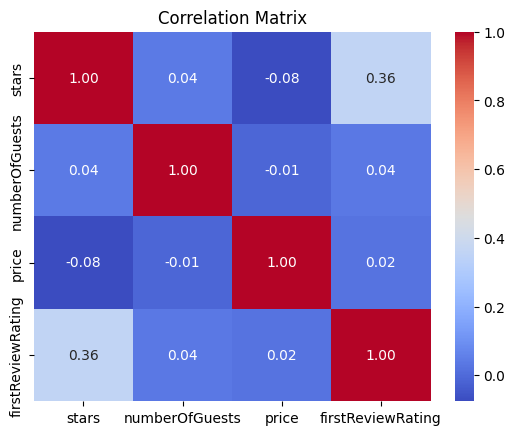

In [51]:
# Display correlation matrix for numerical columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


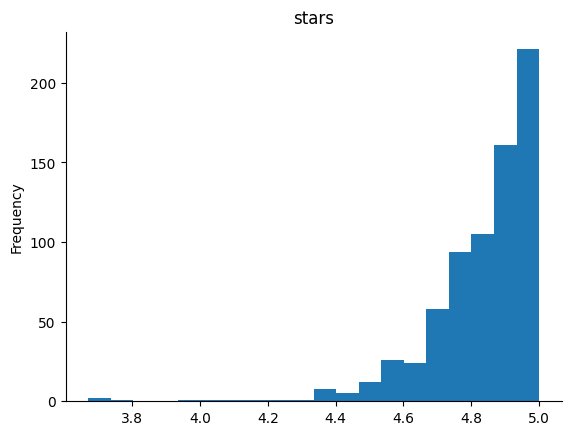

In [52]:
# frequency of stars
df['stars'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

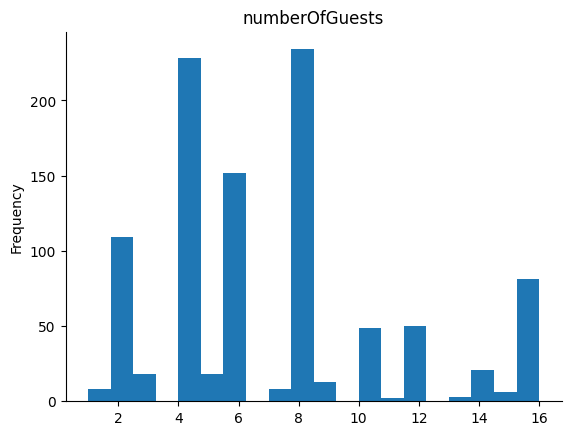

In [53]:
# frequency of number of guests
df['numberOfGuests'].plot(kind='hist', bins=20, title='numberOfGuests')
plt.gca().spines[['top', 'right',]].set_visible(False)

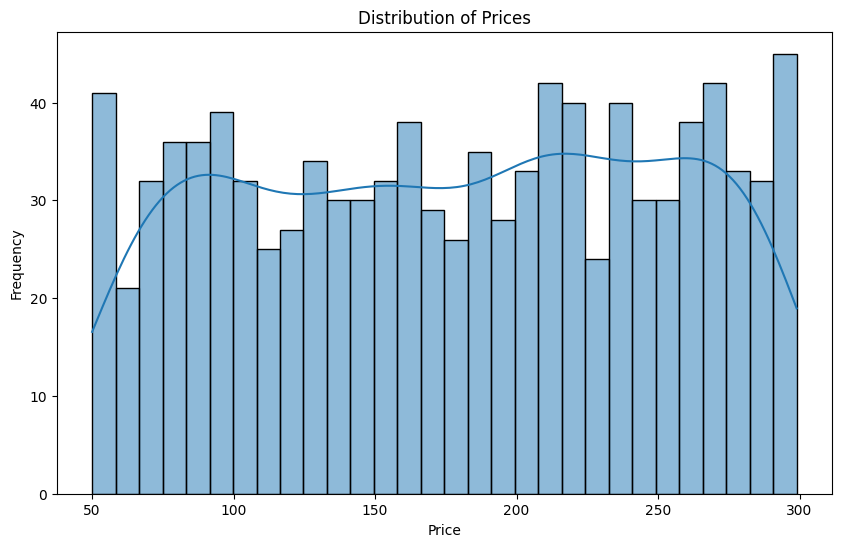

In [54]:
# Visualization
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

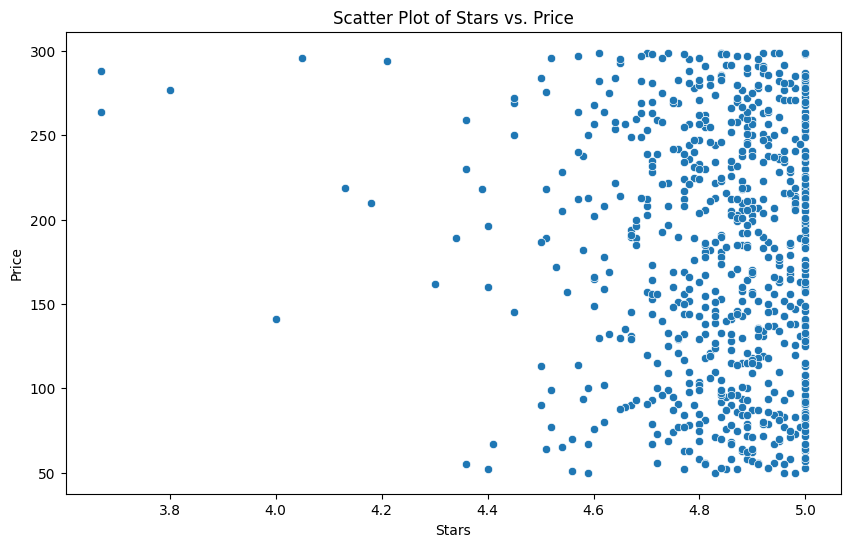

In [55]:
# Scatter plot of stars vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df)
plt.title("Scatter Plot of Stars vs. Price")
plt.xlabel("Stars")
plt.ylabel("Price")
plt.show()

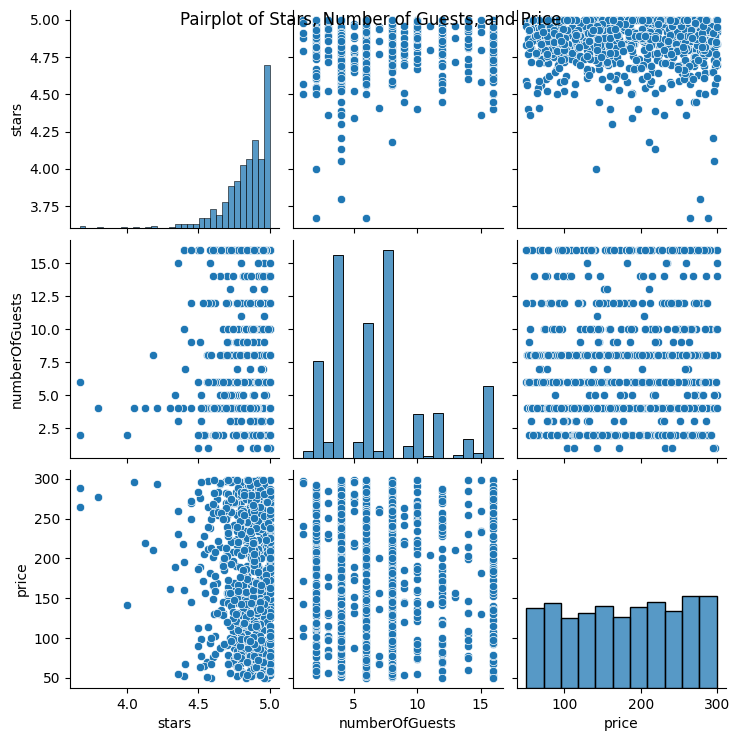

In [56]:
# Pairplot for selected columns
sns.pairplot(df[['stars', 'numberOfGuests', 'price']])
plt.suptitle("Pairplot of Stars, Number of Guests, and Price")
plt.show()

<ipython-input-58-c9412a3689c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='price', y='address', inner='box', palette='Dark2')


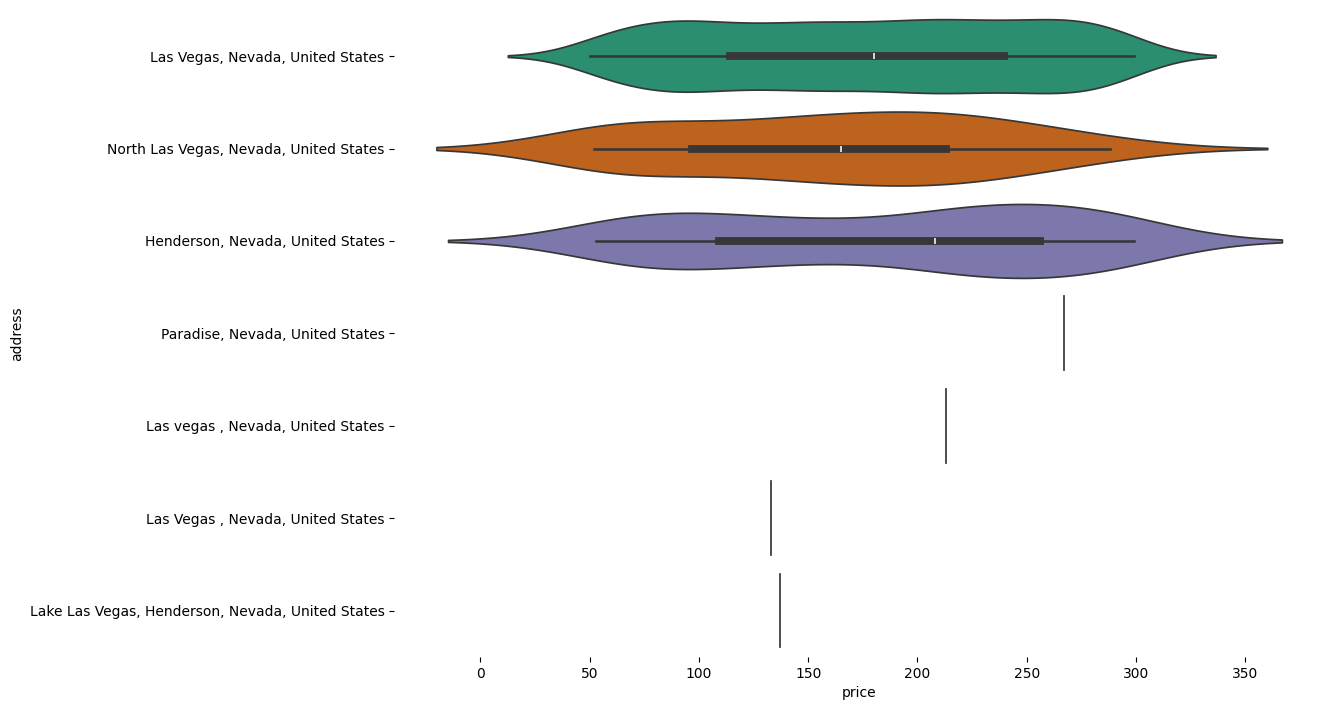

In [58]:
figsize = (12, 1.2 * len(df['address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='price', y='address', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**1. How does the distribution of prices vary across different room types?**

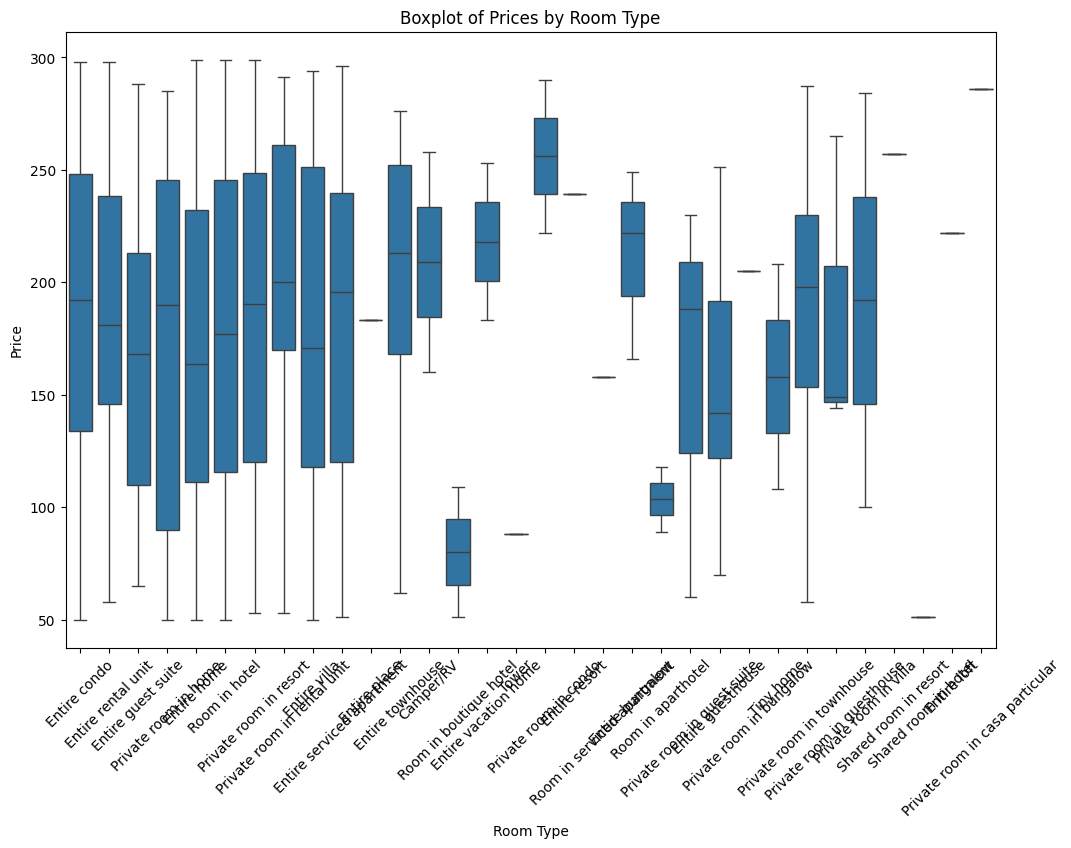

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='roomType', y='price', data=df)
plt.title("Boxplot of Prices by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

**2. What is the distribution of guest ratings (stars) for Airbnb listings in Las Vegas?**

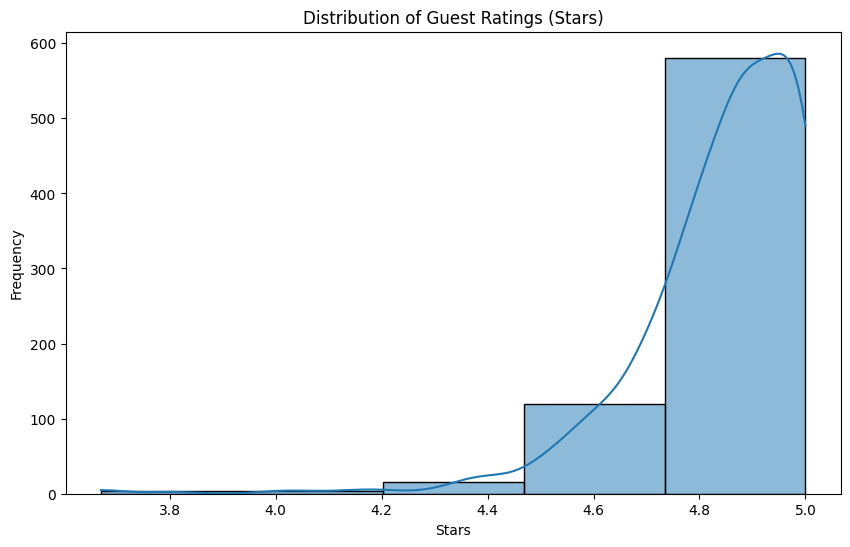

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=5, kde=True)
plt.title("Distribution of Guest Ratings (Stars)")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()

**3. Is there any relationship between the number of guests a listing can accommodate and its price?**

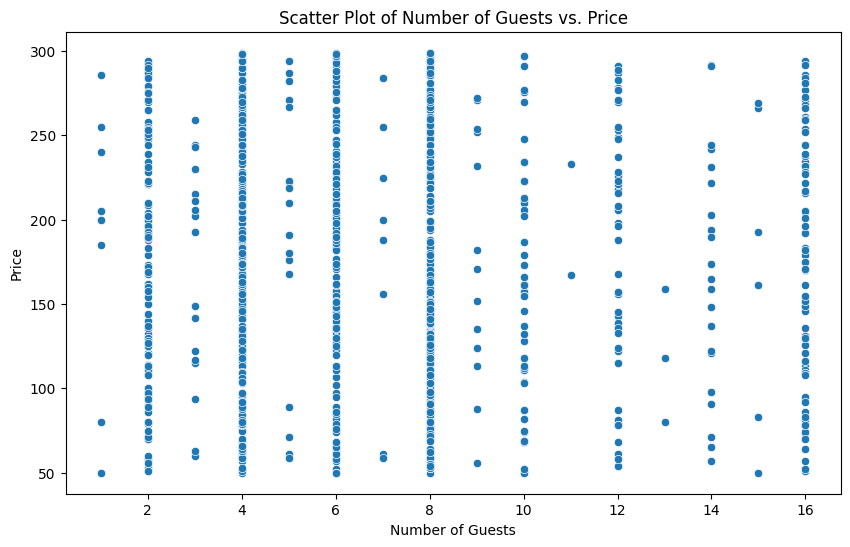

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numberOfGuests', y='price', data=df)
plt.title("Scatter Plot of Number of Guests vs. Price")
plt.xlabel("Number of Guests")
plt.ylabel("Price")
plt.show()


**4. What are the most common addresses for Airbnb listings in Las Vegas?**

<ipython-input-39-be1868a4efe2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_addresses.values, y=top_addresses.index, palette='viridis')


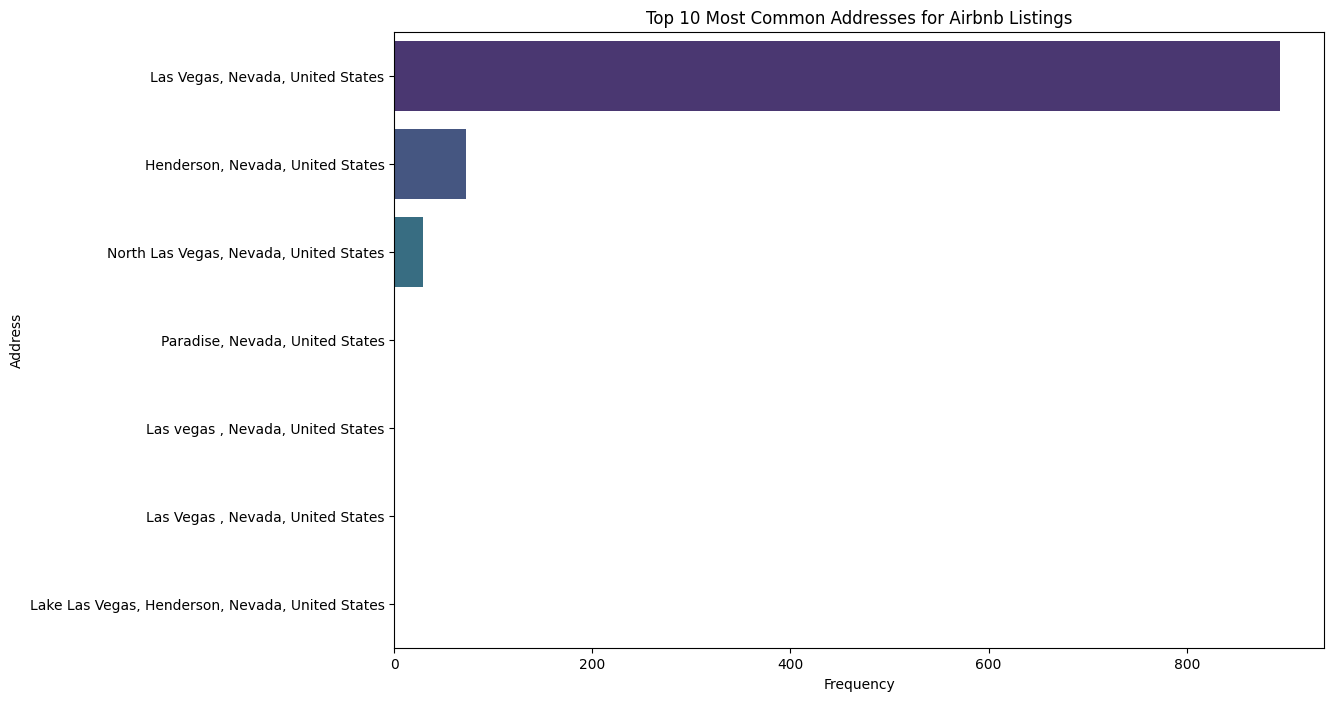

In [39]:
plt.figure(figsize=(12, 8))
top_addresses = df['address'].value_counts().nlargest(10)
sns.barplot(x=top_addresses.values, y=top_addresses.index, palette='viridis')
plt.title("Top 10 Most Common Addresses for Airbnb Listings")
plt.xlabel("Frequency")
plt.ylabel("Address")
plt.show()


**5. How are the first review ratings distributed for the listings?**

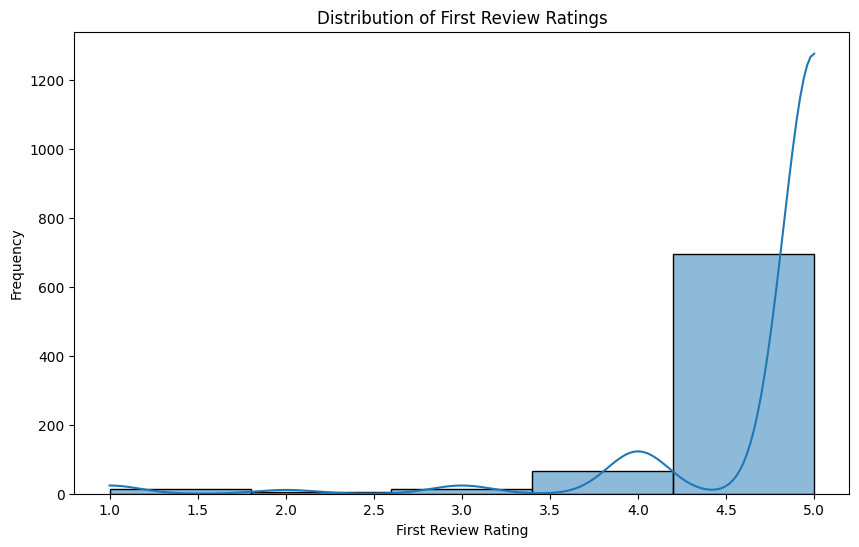

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['firstReviewRating'], bins=5, kde=True)
plt.title("Distribution of First Review Ratings")
plt.xlabel("First Review Rating")
plt.ylabel("Frequency")
plt.show()
